<a href="https://colab.research.google.com/github/SauloHenriqueAguiar/pHSensor/blob/main/testesensorpHcomfiltroMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd 
read_file = pd.read_excel ("/content/dadospHcomfiltroMMruidos.xlsx")

In [5]:
read_file.to_csv ("/content/dadospHcomfiltroMMruidos.csv",  
                  index = None, 
                  header=True)

In [6]:
df = pd.DataFrame(pd.read_csv("/content/dadospHcomfiltroMMruidos.csv"))
df

,indice,pH(antimonio),pH(Akso),pH(aquoso)
0,1,7.16,6.80,5.1
1,2,7.49,7.70,7.4
2,3,8.36,6.43,6.2
3,4,6.51,6.88,6.4
4,5,5.42,5.28,4.6
5,6,5.12,5.85,5.2
6,7,6.91,6.77,6.5
7,8,5.35,5.56,4.9
8,9,5.63,5.85,5.0
9,10,5.49,5.33,4.7


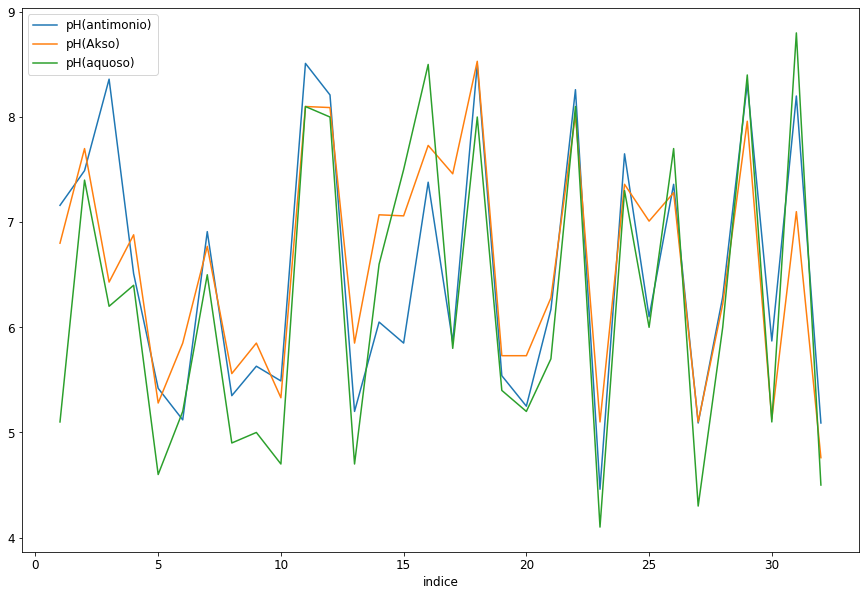

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setup matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
plt.rcParams["figure.figsize"] = (15,10)
# Create an axes object 
axes = plt.gca()

#gráfico temperatura x pH
# pass the axes object to plot function
df.plot(kind='line', x='indice', y='pH(antimonio)', ax=axes);
df.plot(kind='line', x='indice', y='pH(Akso)', ax=axes);
df.plot(kind='line', x='indice', y='pH(aquoso)', ax=axes);


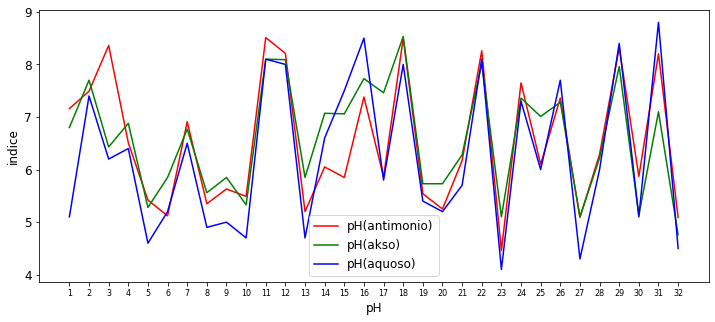

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12, 5
#df = pd.read_excel(file_location).ffill()
sns.lineplot(x=df['indice'].astype(str),
             y=df['pH(antimonio)'],color='r')
sns.lineplot(x=df['indice'].astype(str),
             y=df['pH(Akso)'],color='g')
sns.lineplot(x=df['indice'].astype(str),
             y=df['pH(aquoso)'],color='b')

plt.legend(['pH(antimonio)','pH(akso)','pH(aquoso)'])
plt.ylabel('indice')
plt.xlabel('pH')
plt.tick_params(axis='x',labelsize=8)

###pH(Antimonio) x pH(Akso)

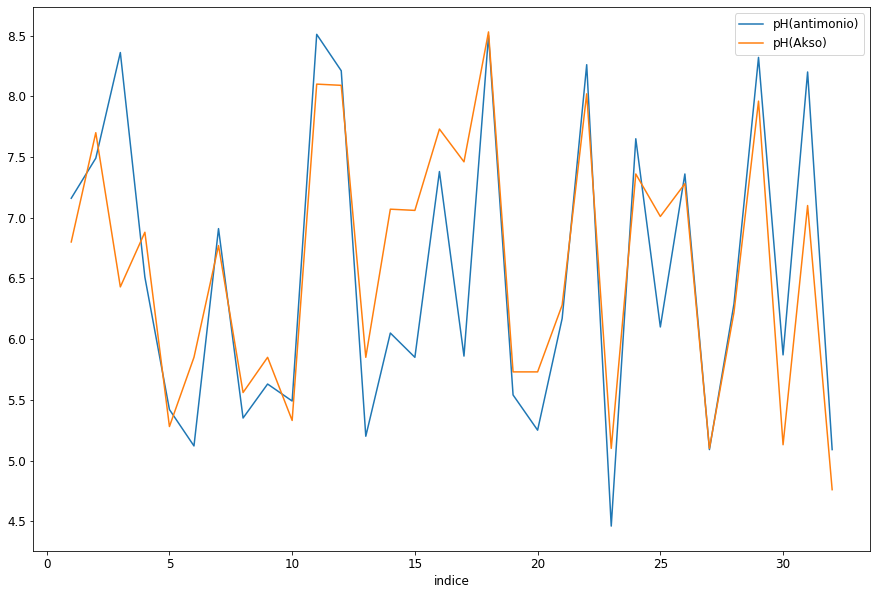

In [11]:
plt.rcParams.update({'font.size': 12})
plt.rcParams["figure.figsize"] = (15,10)
# Create an axes object 
axes = plt.gca()

#gráfico temperatura x pH
# pass the axes object to plot function
df.plot(kind='line', x='indice', y='pH(antimonio)', ax=axes);
df.plot(kind='line', x='indice', y='pH(Akso)', ax=axes);

###pH(Antimonio) x pH(meio aquoso)

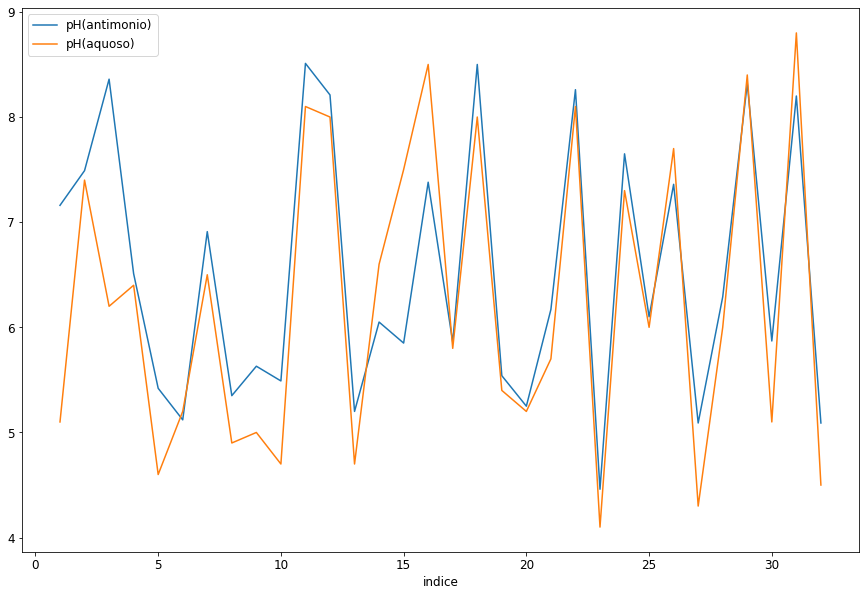

In [12]:
plt.rcParams.update({'font.size': 12})
plt.rcParams["figure.figsize"] = (15,10)
# Create an axes object 
axes = plt.gca()

#gráfico temperatura x pH
# pass the axes object to plot function
df.plot(kind='line', x='indice', y='pH(antimonio)', ax=axes);
df.plot(kind='line', x='indice', y='pH(aquoso)', ax=axes);

###Correlação de Pearson

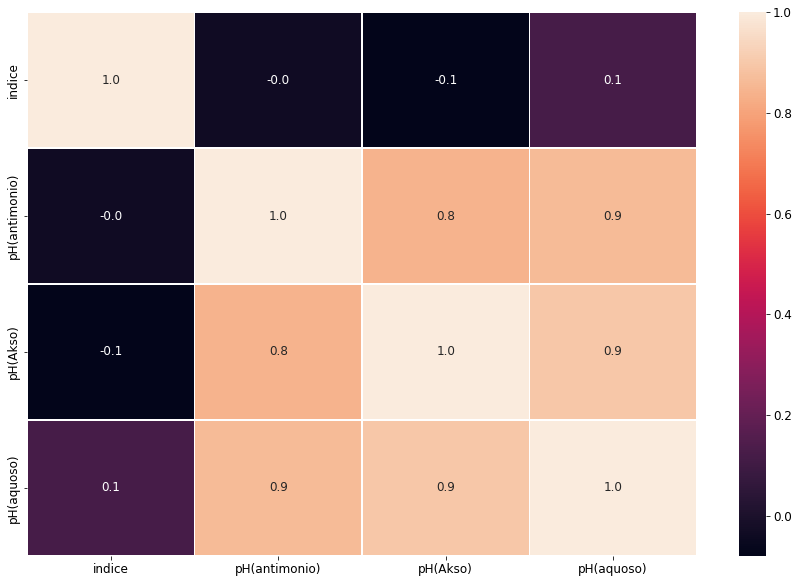

In [13]:
#correlação de pearson
correlation = df.corr()

# plot da matriz de correlação
import seaborn as sn
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

###Calculando o teste de correlação de Pearson entre pH(Antimonio) x pH(Akso)

In [14]:
import numpy as np
corr = np.corrcoef(df['pH(antimonio)'], df['pH(Akso)'])
print(corr)

[[1.         0.84306029]
 [0.84306029 1.        ]]


###Calculando o teste de correlação de Pearson entre pH(Antimonio) x pH(Aquoso)

In [15]:
corr = np.corrcoef(df['pH(antimonio)'], df['pH(aquoso)'])
print(corr)

[[1.         0.86428148]
 [0.86428148 1.        ]]


###Correlação Spearman

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns # For pairplots and heatmaps
import matplotlib.pyplot as plt

def display_correlation(discorr):
    r = discorr.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(discorr.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

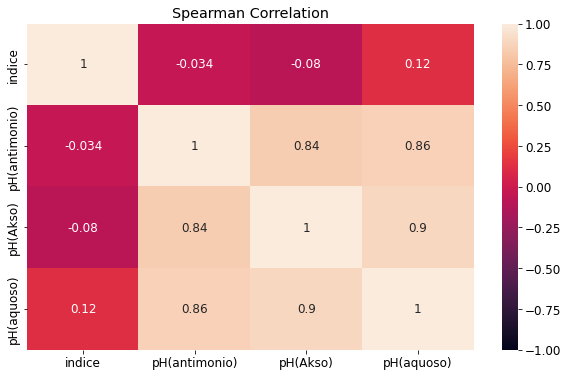

In [17]:
r_simple=display_correlation(df)

### Analises de ruidos(diferenças)

In [18]:
df['dif_pH_antimonio'] = df['pH(antimonio)'].diff()
df['dif_pH_akso'] = df['pH(Akso)'].diff()
df['dif_pH_aquoso'] = df['pH(aquoso)'].diff()


df

,indice,pH(antimonio),pH(Akso),pH(aquoso),dif_pH_antimonio,dif_pH_akso,dif_pH_aquoso
0,1,7.16,6.80,5.1,NaN,NaN,NaN
1,2,7.49,7.70,7.4,0.33,0.90,2.3
2,3,8.36,6.43,6.2,0.87,-1.27,-1.2
3,4,6.51,6.88,6.4,-1.85,0.45,0.2
4,5,5.42,5.28,4.6,-1.09,-1.60,-1.8
5,6,5.12,5.85,5.2,-0.30,0.57,0.6
6,7,6.91,6.77,6.5,1.79,0.92,1.3
7,8,5.35,5.56,4.9,-1.56,-1.21,-1.6
8,9,5.63,5.85,5.0,0.28,0.29,0.1
9,10,5.49,5.33,4.7,-0.14,-0.52,-0.3


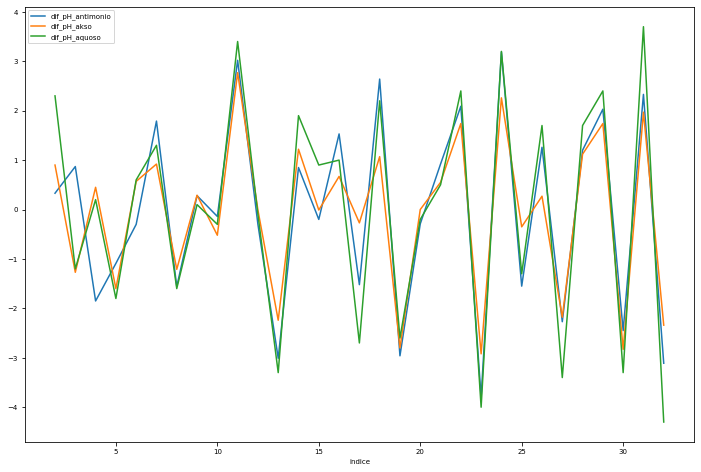

In [19]:
plt.rcParams.update({'font.size': 7})
plt.rcParams["figure.figsize"] = (12,8)
# Create an axes object 
axes = plt.gca()



df.plot(kind='line', x='indice', y='dif_pH_antimonio', ax=axes);
df.plot(kind='line', x='indice', y='dif_pH_akso', ax=axes);
df.plot(kind='line', x='indice', y='dif_pH_aquoso', ax=axes);

###Calculando o MSE
O Erro Quadrado Médio (MSE) ou Desvio Quadrado Médio (MSD) de um estimador mede a média dos quadrados do erro, ou seja, a diferença quadrada média entre os valores estimados e o valor verdadeiro. É uma função de risco, correspondente ao valor esperado da perda de erro ao quadrado. É sempre não – negativo e valores próximos de zero são melhores.

In [20]:
from sklearn.metrics import mean_squared_error

###MSE entre pH(antimonio)xpH(akso)

In [21]:
# Given values
Y_truek = df['pH(Akso)']  # Y_true = Y (original values)

# calculated values
Y_predk = df['pH(antimonio)']  # Y_pred = Y'

# Calculation of Mean Squared Error (MSE)
mean_squared_error(Y_truek,Y_predk)

0.4432531249999999

### MSE entre pH(antimonio)xpH(aquoso)

In [22]:
Y_trueaq = df['pH(aquoso)']  # Y_true = Y (original values)

# calculated values
Y_predaq = df['pH(antimonio)']  # Y_pred = Y'

# Calculation of Mean Squared Error (MSE)
mean_squared_error(Y_trueaq,Y_predaq)

0.583028125

###Calculando o MAE
O erro absoluto médio mede as diferenças médias entre os valores previstos e os valores reais. O erro absoluto médio pode ajudar a medir a precisão de um determinado modelo. quanto mais próximo o valor do MAE estiver de 0, melhor. Digamos que você tenha um MAE de 10. Isso significa que, em média, o MAE está 10 longe do valor previsto.

In [23]:
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

### MAE entre pH(antimonio)xpH(akso)

In [24]:
from sklearn.metrics import mean_absolute_error

truek = df['pH(Akso)']
predictedk = df['pH(antimonio)']

print(mean_absolute_error(truek, predictedk))

0.4815625000000001


###MAE entre pH(antimonio)xpH(aquoso)

In [25]:
from sklearn.metrics import mean_absolute_error

trueaq = df['pH(aquoso)']
predictedaq = df['pH(antimonio)']

print(mean_absolute_error(trueaq, predictedaq))

0.5528125000000002


###Diferença Percentual Absoluta(MAPE)
O MAPE (Erro Absoluto Médio Percentual) mede o erro em porcentagem. 
O erro médio absoluto percentual (MAPE) expressa precisão como uma porcentagem do erro. Como o MAPE é uma porcentagem, pode ser mais fácil de entender do que as outras estatísticas de medida de precisão. Por exemplo, se o MAPE é 5, em média, a previsão está incorreta em 5%. O erro percentual absoluto médio (MAPE — do inglês Mean Absolute Percentual Error) é uma métrica que mostra a porcentagem de erro em relação aos valores reais. Na equação 4 representa o cálculo de MAPE que basicamente se parece com MAE, mas com o acréscimo de uma divisão por |y|. Então se o resultado de MAPE for igual a 40% significa que o nosso modelo faz previsões que em média a diferença entre o valor previsto e o real equivale a 40% do valor real tanto para mais quanto para menos.

###MAPE pH(antimonio)xpH(akso)

In [26]:
LR_MAPE= MAPE(truek,predictedk)
print("MAPE: ",LR_MAPE)

MAPE:  7.38759877863881


###MAPE pH(antimonio)xpH(aquoso)

In [27]:
# Using MAPE error metrics to check for the error rate and accuracy level
LR_MAPE= MAPE(trueaq,predictedaq)
print("MAPE: ",LR_MAPE)

MAPE:  9.505219476079724


###R-quadrado
R Squared é uma medida que informa até que ponto a proporção da variância na variável dependente é explicada pela variância nas variáveis ​​independentes. Em termos mais simples, enquanto os coeficientes estimam tendências, o R-quadrado representa a dispersão ao redor da linha de melhor ajuste.

Por exemplo, se o R² for 0,80, então 80% da variação pode ser explicada pelas entradas do modelo.

Se o R² for 1,0 ou 100%, significa que todos os movimentos da variável dependente podem ser inteiramente explicados pelos movimentos das variáveis ​​independentes.

### R² pH(antimonio)xpH(akso)

In [28]:
import sklearn
from sklearn.metrics import r2_score
sklearn.metrics.r2_score(truek, predictedk)

0.5980201555308682

### R² pH(antimonio)xpH(aquoso)

In [29]:
sklearn.metrics.r2_score(trueaq, predictedaq)

0.7087532928756806